In [2]:
import os
import simulation
import pynbody
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table
from data_pd.dump_features import dump_features
from simulation.sfh_in_box import binned_sfh, plot_binned_sfh
import tqdm
import astropy.units as u

In [3]:
# SIM_PATH = "/media/michele/My Book/Michele/MySimulations/MovingBox/np/mb.62002_pXX_a800_r600"
SIM_PATH = "/home/michele/sim/MySimulations/ng/mb.71002_pXX_a800_r600"
PERI_LIST = [50, 100, 150, 200, 300]

In [4]:
NTH = 1

In [5]:
sims = list()
for peri in PERI_LIST:
    sim_path = os.path.join(SIM_PATH.replace('XX', str(peri)), 'out')
    sims.append(simulation.Simulation(sim_path, snap_indexes=slice(None, None, NTH))) 

loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p50_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 563 snapshots (slice(None, None, 1))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p100_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 563 snapshots (slice(None, None, 1))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p150_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 563 snapshots (slice(None, None, 1))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/ng/mb.71002_p200_a800_r600/out
Found parameter file
Found compiler file
Found 563 snapshots
Taking 563 snapshots (slice(None, None, 1))
Loading cosmological parameters
Found trace file
loading simulation: /home/michele/sim/MySimulations/n

In [6]:
cache_files = ['mb.71002_pXX_a800_r600_s5.fits'.replace('XX', str(peri)) for peri in PERI_LIST]

In [7]:
cache_files

['mb.71002_p50_a800_r600_s5.fits',
 'mb.71002_p100_a800_r600_s5.fits',
 'mb.71002_p150_a800_r600_s5.fits',
 'mb.71002_p200_a800_r600_s5.fits',
 'mb.71002_p300_a800_r600_s5.fits']

In [8]:
tbl_list = list()
tbl_list = [Table.read(os.path.join('data_pd', f)) for f in cache_files]

# Trajectories

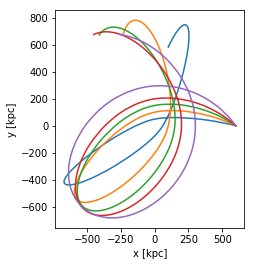

In [9]:
fig, ax = plt.subplots()
for sim in sims:
    ax.plot(sim.trace.x, sim.trace.y)
    ax.set_aspect('equal')
    ax.set_xlabel('x [kpc]')
    ax.set_ylabel('y [kpc]')

In [10]:
a = sims[0]

# SFH

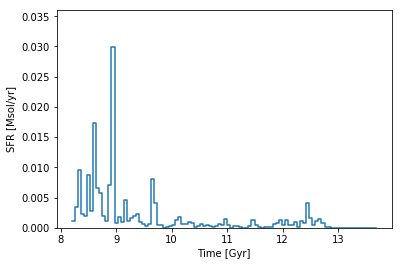

In [11]:
fig, ax = plt.subplots()
bins_sfh = 100
hist, binedges = plot_binned_sfh(sim, bins=bins_sfh, ax=ax, drawstyle='steps')

100%|██████████| 5/5 [00:13<00:00,  2.37s/it]


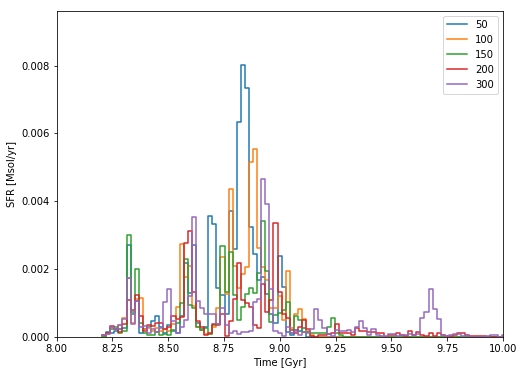

In [12]:
fig, ax = plt.subplots(figsize=(8,6))
for sim in tqdm.tqdm(sims):
    plot_binned_sfh(sim, bins=300, ax=ax, label=sim.peri, drawstyle='default');
    
ax.set_xlim(8, 10)
ax.legend()

In [13]:
# i = a._sim_dir.find('_p')
# j = a._sim_dir.find('_a')
# a._sim_dir[i+2:j]

In [14]:
# fig, ax = plt.subplots(figsize=(8,6))
# for sim in sims:
#     print(sim.peri)
#     plot_sfh(sim, ax=ax, label=sim.peri)#, trange=a.t_range, bins=20)

# Effective radius

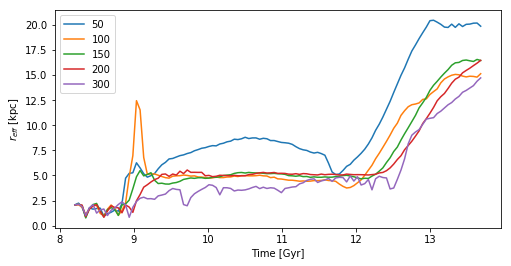

In [15]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'][::5], tbl['r_eff'][::5], label=sim.peri)
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$r_{eff}$ [kpc]')
ax.legend();

# Metals

In [16]:
tbl_m = Table.read('71metals_s5.fits')

In [23]:
maz = 0
for sim in sims:
    for snap in sim:
        loc_max_z = snap.s['metals'].max()
        if loc_max_z > maz:
            maz=loc_max_z
maz
    

SimArray(1.6449445, dtype=float32)

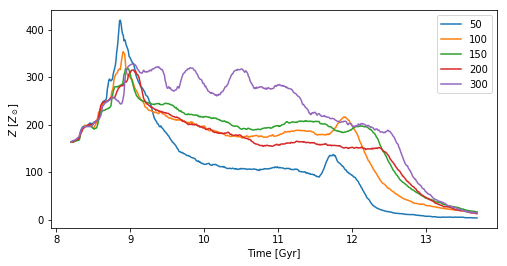

In [24]:
fig, ax = plt.subplots(figsize=(8,4))
for tbl, sim in zip(tbl_list, sims):
    ax.plot(tbl['t'], tbl_m[sim.peri], label=sim.peri)
# ax.set_yscale('log')
ax.set_xlabel('Time [Gyr]')
ax.set_ylabel('$Z$ [$Z_\odot$]')
ax.legend();

# Profiles

In [6]:
from my_angmom_rotations import mysideon, myfaceon

In [7]:
from simulation.derived import feh, mgfe

In [11]:
snap

<SimSnap "/home/michele/sim/MySimulations/ng/mb.71002_p50_a800_r600/out/snapshot_0101" len=210175>

 before rotation L: [-3.0413503e-09  2.7609569e-01 -2.1893356e-08]
 after rotation  L: [3.929017e-09 2.760957e-01 1.805165e-08]
<SimSnap "/home/michele/sim/MySimulations/ng/mb.71002_p50_a800_r600/out/snapshot_0101::star" len=7856>


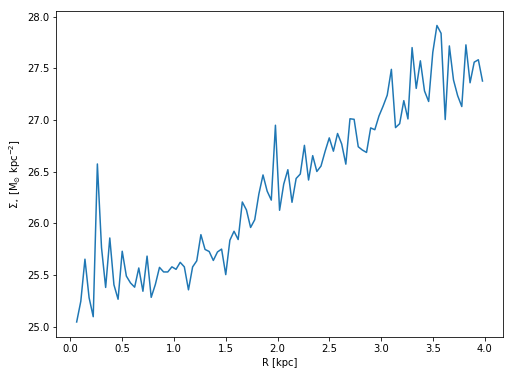

In [18]:
# create a profile object for the stars (by default this is a 2D profile)
snap = sims[0][100]
# myfaceon(snap.s)
mysideon(snap.s)
print(snap.s)
snap.properties['eps'] = 0.03


p = pynbody.analysis.profile.Profile(snap.s, min=0.0, max=4, nbins=100, type='lin', ndim=2)

# make the figure and sub plots
f, ax = plt.subplots(figsize=(8,6))

# make the plot
ax.plot(p['rbins'], p['sb'])
# ax.semilogy()
ax.set_xlabel('R [kpc]')
# ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]');
ax.set_ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ kpc$^{-2}$]');

## For loop

In [ ]:
surf_bright = {}
v_circ = {}
dens = {}
sim = sims[1]
for i, snap in enumerate(sim):
    # myfaceon(snap.s)
    mysideon(snap.s)
    print(snap.s)
    snap.properties['eps'] = 0.03
    p = pynbody.analysis.profile.Profile(snap.s, max=4, nbins=100, type='lin', ndim=2)
    surf_bright[i+1] = p['sb']
    v_circ[i+1] = p['v_circ']
    dens[i+1] = p['density']
# TODO catch the ValueError for few particles and skip snaps

In [25]:
tbl_v_circ = Table({str(k):v*u.km/u.s for (k,v) in v_circ.items()})
tbl_sb = Table({str(k):v*u.mag/u.arcsec**2 for (k,v) in surf_bright.items()})
tbl_dens = Table({str(k):v.in_units('Msol kpc**-2')*u.solMass/u.kpc**2 for (k,v) in dens.items()})

SyntaxError: invalid syntax (<ipython-input-25-45cb7be563ee>, line 1)

In [ ]:
tbl_v_circ['rbins'] = tbl_sb['rbins'] = tbl_dens['rbins'] = p['rbins']*u.kpc

In [24]:
tbl_v_circ.write('71p{}prof_v_circ.fits'.format(sim.peri), overwrite=True)
tbl_sb.write('71p{}prof_sb.fits'.format(sim.peri), overwrite=True)
tbl_dens.write('71p{}prof_dens.fits'.format(sim.peri), overwrite=True)

In [30]:
sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
sim[0].s['v_mag']

SimArray([-4.64873251, -4.65790806, -4.65767434, ..., -4.75508825,
          -4.66428094, -4.75875018])

In [26]:
str(71002)[:2]

'71'

In [31]:
# sphere = pynbody.filt.Sphere(5 * pynbody.units.kpc)
# metals_d = dict()
# for sim in sims:
#     metals_l = list()
#     for snap in tqdm.tqdm(sim.snap_list):
#         pynbody.analysis.halo.center(snap.s, vel=False)
#         metals_l.append(snap.s[sphere]['metals'].sum())
#     metals = np.array(metals_l)
#     metals_d[sim.peri] = metals
# tbl = Table(metals_d)
# tbl.write('71metals_s5.fits')